In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [235]:
df = pd.read_csv('prepared_data.csv')
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40.0,1,0,0,0,...,1,0,5,18.0,15.0,1,0,9,4,3
1,1,0,0,0,0,25.0,1,0,0,1,...,0,1,3,0.0,0.0,0,0,7,6,1
2,2,0,1,1,1,28.0,0,0,0,0,...,1,1,5,30.0,30.0,1,0,9,4,8
3,3,0,1,0,1,27.0,0,0,0,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,4,0,1,1,1,24.0,0,0,0,1,...,1,0,2,3.0,0.0,0,0,11,5,4


Graph: BMI - Diabetes Frequency

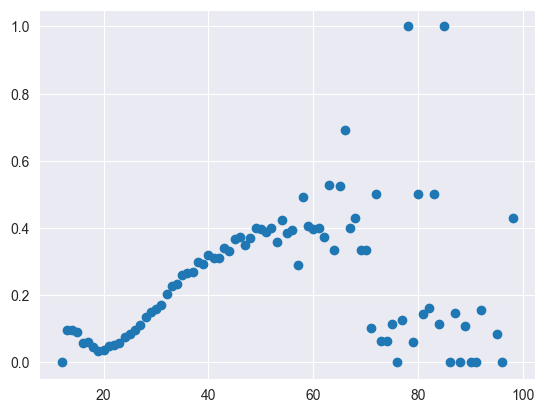

In [236]:
graph_BMI_diabetes_freq = df.groupby('BMI')['Diabetes_binary'].mean().reset_index()
plt.scatter(x=graph_BMI_diabetes_freq['BMI'], y=graph_BMI_diabetes_freq['Diabetes_binary'])
plt.show()

Logarithm the scale

In [237]:
df['log_BMI'] = np.log(df['BMI'])
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
0,0,0,1,1,1,40.0,1,0,0,0,...,0,5,18.0,15.0,1,0,9,4,3,3.688879
1,1,0,0,0,0,25.0,1,0,0,1,...,1,3,0.0,0.0,0,0,7,6,1,3.218876
2,2,0,1,1,1,28.0,0,0,0,0,...,1,5,30.0,30.0,1,0,9,4,8,3.332205
3,3,0,1,0,1,27.0,0,0,0,1,...,0,2,0.0,0.0,0,0,11,3,6,3.295837
4,4,0,1,1,1,24.0,0,0,0,1,...,0,2,3.0,0.0,0,0,11,5,4,3.178054


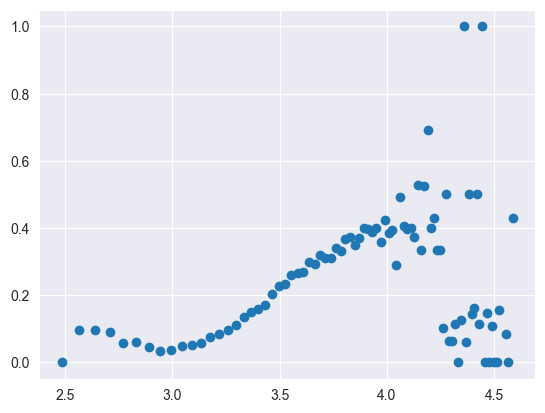

In [238]:
graph_log_BMI_diabetes_freq = df.groupby('log_BMI')['Diabetes_binary'].mean().reset_index()
plt.scatter(x=graph_log_BMI_diabetes_freq['log_BMI'], y=graph_BMI_diabetes_freq['Diabetes_binary'])
plt.show()

Dictionary of all models with scores

In [239]:
models = {}

First Simple Logistic Regression model

In [240]:
df.head(1)

,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
0,0,0,1,1,1,40.0,1,0,0,0,...,0,5,18.0,15.0,1,0,9,4,3,3.688879


In [241]:
X = df.loc[:, ['BMI']]
y = df.loc[:, 'Diabetes_binary']

print(X.shape)
print(y.shape)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

(253680, 1)
(253680,)


In [242]:
simple_logit_model = LogisticRegression(random_state=1)
simple_logit_model.fit(train_X, train_y)

LogisticRegression(random_state=1)

In [243]:
def get_mse(model, test_X, test_y):
    y_pred = model.predict(test_X)
    mse = mean_squared_error(test_y, y_pred)
    return mse

In [244]:
models['simple_logit_model'] = {
    'train': {
        'score': round(simple_logit_model.score(train_X, train_y), 4),
        'mse': round(float(get_mse(simple_logit_model, train_X, train_y)), 4)
    },
    'test': {
        'score': round(simple_logit_model.score(val_X, val_y), 4),
        'mse': round(float(get_mse(simple_logit_model, val_X, val_y)), 4)
    }
}

print(models['simple_logit_model'])

{'train': {'score': 0.8584, 'mse': 0.1416}, 'test': {'score': 0.8568, 'mse': 0.1432}}


Simple Log Bmi Logit Model

In [245]:
X = df.loc[:, ['log_BMI']]
y = df.loc[:, 'Diabetes_binary']

print(X.shape)
print(y.shape)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

(253680, 1)
(253680,)


In [246]:
log_bmi_logit_model = LogisticRegression(random_state=1)
log_bmi_logit_model.fit(train_X, train_y)

log_bmi_logit_model.score(val_X, val_y)

0.857190160832545

In [247]:
models['log_bmi_logit_model'] = {
    'train': {
        'score': round(log_bmi_logit_model.score(train_X, train_y), 4),
        'mse': round(float(get_mse(log_bmi_logit_model, train_X, train_y)), 4)
    },
    'test': {
        'score': round(log_bmi_logit_model.score(val_X, val_y), 4),
        'mse': round(float(get_mse(log_bmi_logit_model, val_X, val_y)), 4)
    }
}


print(models['log_bmi_logit_model'])

{'train': {'score': 0.8588, 'mse': 0.1412}, 'test': {'score': 0.8572, 'mse': 0.1428}}


Multivariate logistic regression

In [248]:
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
0,0,0,1,1,1,40.0,1,0,0,0,...,0,5,18.0,15.0,1,0,9,4,3,3.688879
1,1,0,0,0,0,25.0,1,0,0,1,...,1,3,0.0,0.0,0,0,7,6,1,3.218876
2,2,0,1,1,1,28.0,0,0,0,0,...,1,5,30.0,30.0,1,0,9,4,8,3.332205
3,3,0,1,0,1,27.0,0,0,0,1,...,0,2,0.0,0.0,0,0,11,3,6,3.295837
4,4,0,1,1,1,24.0,0,0,0,1,...,0,2,3.0,0.0,0,0,11,5,4,3.178054


In [249]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)

print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(190260, 22)
(190260,)
(63420, 22)
(63420,)


In [250]:
multivariate_logit_model = LogisticRegression(random_state=1)
multivariate_logit_model.fit(train_X, train_y)

multivariate_logit_model.score(scaler.transform(val_X), val_y)

0.8644433932513402

In [256]:
models['multivariate_logit_model'] = {
    'train': {
        'score': round(multivariate_logit_model.score(train_X, train_y), 4),
        'mse': round(float(get_mse(multivariate_logit_model, train_X, train_y)), 4)
    },
    'test': {
        'score': round(multivariate_logit_model.score(scaler.transform(val_X), val_y), 4),
        'mse': round(float(get_mse(multivariate_logit_model, scaler.transform(val_X), val_y)), 4)
    }
}

print(models['multivariate_logit_model'])

{'train': {'score': 0.8651, 'mse': 0.1349}, 'test': {'score': 0.8644, 'mse': 0.1356}}


Comparing models

In [252]:
for model in models:
    print(f"Model name: {model}")
    for data in models[model]:
        print(f"\t{data}")
        print(f"\tScore: {models[model][data]['score']}")
        print(f"\tMSE: {models[model][data]['mse']}")
    print('-' * 50)

Model name: simple_logit_model
	train
	Score: 0.8584
	MSE: 0.1416
	test
	Score: 0.8568
	MSE: 0.1432
--------------------------------------------------
Model name: log_bmi_logit_model
	train
	Score: 0.8588
	MSE: 0.1412
	test
	Score: 0.8572
	MSE: 0.1428
--------------------------------------------------
Model name: multivariate_logit_model
	train
	Score: 0.8651
	MSE: 0.1349
	test
	Score: 0.8602
	MSE: 0.1398
--------------------------------------------------


In [188]:
# TODO: Write more complex log regression model with polynomials of log(BMI)